In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data with pandas
data = pd.read_csv('diamond.csv')

In [3]:
# checking head of data
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [4]:
# check shape of data
data.shape

(6000, 8)

# 👉 Exploratory Data Analysis

## Option 1: Pandas Profiling

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Option 2: SweetViz

In [6]:
import sweetviz as sv
report = sv.analyze(data, target_feat = 'Price')
report.show_html('diamond.html')

                                             |                                             | [  0%]   00:00 ->…

Report diamond.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 👉 Modeling

In [12]:
from pycaret.regression import *
s = setup(data, target = 'Price', session_id = 123,
          bin_numeric_features = ['Carat Weight'],
          polynomial_features = True, trigonometry_features = True,
          feature_interaction = True)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 72)"


In [15]:
# check transformed train set
get_config('X_train').head()

,Carat Weight_Power2,cos(Carat Weight),Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,...,Clarity_VS1_multiply_Carat Weight_Power2,Cut_Ideal_multiply_cos(Carat Weight),Carat Weight_Power2_multiply_Report_GIA,Polish_EX_multiply_Carat Weight_Power2,Report_GIA_multiply_Carat Weight_Power2,Polish_VG_multiply_Carat Weight_Power2,cos(Carat Weight)_multiply_Report_GIA,Polish_VG_multiply_cos(Carat Weight),Cut_Ideal_multiply_Carat Weight_Power2,Color_D_multiply_Carat Weight_Power2
3609,2.4649,0.000796,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.4649,0.000796,2.4649,2.4649,2.4649,0.0000,0.000796,0.000000,2.4649,0.0
5269,0.5625,0.731689,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.5625,0.000000,0.5625,0.0000,0.5625,0.0000,0.731689,0.000000,0.0000,0.0
59,0.8464,0.605820,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0000,0.000000,0.8464,0.0000,0.8464,0.8464,0.605820,0.605820,0.0000,0.0
1981,0.8281,0.613746,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0000,0.000000,0.8281,0.8281,0.8281,0.0000,0.613746,0.000000,0.0000,0.0
3353,0.5929,0.717911,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0000,0.000000,0.0000,0.0000,0.0000,0.5929,0.000000,0.717911,0.0000,0.0


In [23]:
# check all new columns in train set
get_config('X_train').columns

Index(['Carat Weight_Power2', 'cos(Carat Weight)', 'Cut_Fair', 'Cut_Good',
       'Cut_Ideal', 'Cut_Signature-Ideal', 'Cut_Very Good', 'Color_D',
       'Color_E', 'Color_F', 'Color_G', 'Color_H', 'Color_I', 'Clarity_FL',
       'Clarity_IF', 'Clarity_SI1', 'Clarity_VS1', 'Clarity_VS2',
       'Clarity_VVS1', 'Clarity_VVS2', 'Polish_EX', 'Polish_G', 'Polish_ID',
       'Polish_VG', 'Symmetry_EX', 'Symmetry_G', 'Symmetry_ID', 'Symmetry_VG',
       'Report_GIA', 'Carat Weight_0.0', 'Carat Weight_1.0',
       'Carat Weight_10.0', 'Carat Weight_11.0', 'Carat Weight_12.0',
       'Carat Weight_13.0', 'Carat Weight_2.0', 'Carat Weight_3.0',
       'Carat Weight_4.0', 'Carat Weight_5.0', 'Carat Weight_6.0',
       'Carat Weight_7.0', 'Carat Weight_8.0', 'Carat Weight_9.0',
       'Symmetry_VG_multiply_cos(Carat Weight)',
       'Clarity_IF_multiply_Carat Weight_Power2',
       'Color_F_multiply_Carat Weight_Power2',
       'Clarity_SI1_multiply_Carat Weight_Power2',
       'Symmetry_EX_multip

In [14]:
# compare models with only selected models
best_model = compare_models(include = ['lr', 'ridge', 'lasso', 'xgboost', 'lightgbm', 'dt'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,673.5393,1758354.6875,1308.7960,0.9833,0.0723,0.0536,0.3910
dt,Decision Tree Regressor,933.8614,3022753.7903,1723.8533,0.9709,0.1059,0.0765,0.0310
lightgbm,Light Gradient Boosting Machine,761.4402,3260087.6710,1742.1402,0.9699,0.0787,0.0571,0.1020
ridge,Ridge Regression,1141.2023,4321883.8750,2060.9604,0.9580,0.1313,0.1013,0.0200
lasso,Lasso Regression,1140.5688,4352080.5750,2068.3263,0.9577,0.1306,0.1008,0.0430
lr,Linear Regression,1148.5137,4437776.8000,2085.5332,0.9572,0.1329,0.1016,0.0190


In [17]:
# check hold-out score
predict_model(best_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,700.1190,2229685.0000,1493.2130,0.9786,0.0717,0.0531


# 👉 Model Analysis

## Residuals Plot

Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

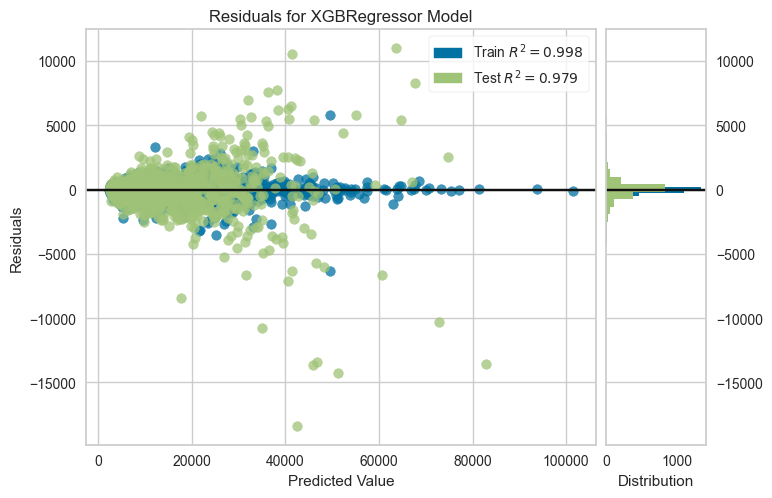

In [19]:
plot_model(best_model, plot = 'residuals')

In [25]:
# interactive residuals (R style)
plot_model(best_model, plot = 'residuals_interactive')

    'data': [{'hovertemplate': 'Split=train<br>Predictions…

## Prediction Error Plot
A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.

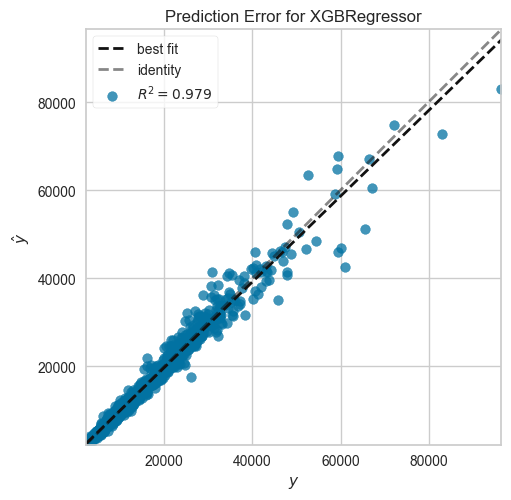

In [20]:
plot_model(best_model, plot = 'error')

## Learning Curve

A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show two things:

How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).

If the estimator is more sensitive to error due to variance vs. error due to bias.

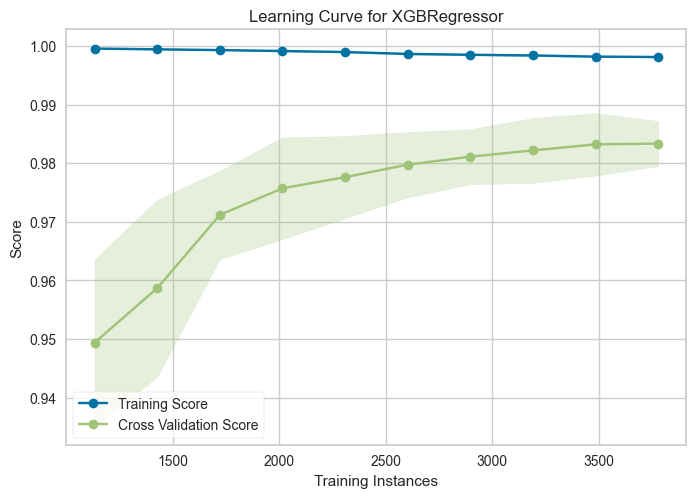

In [21]:
plot_model(best_model, plot = 'learning')

## Feature Importance

Shows the top 10 important features for model. 

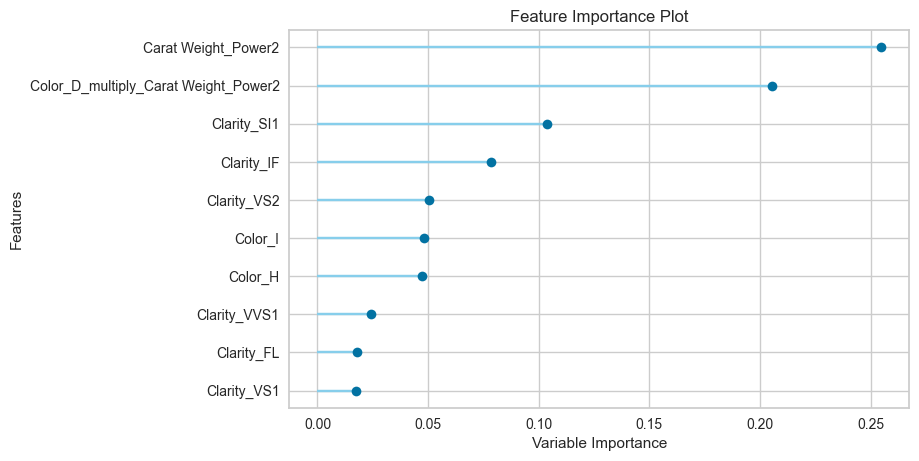

In [22]:
plot_model(best_model, plot = 'feature')

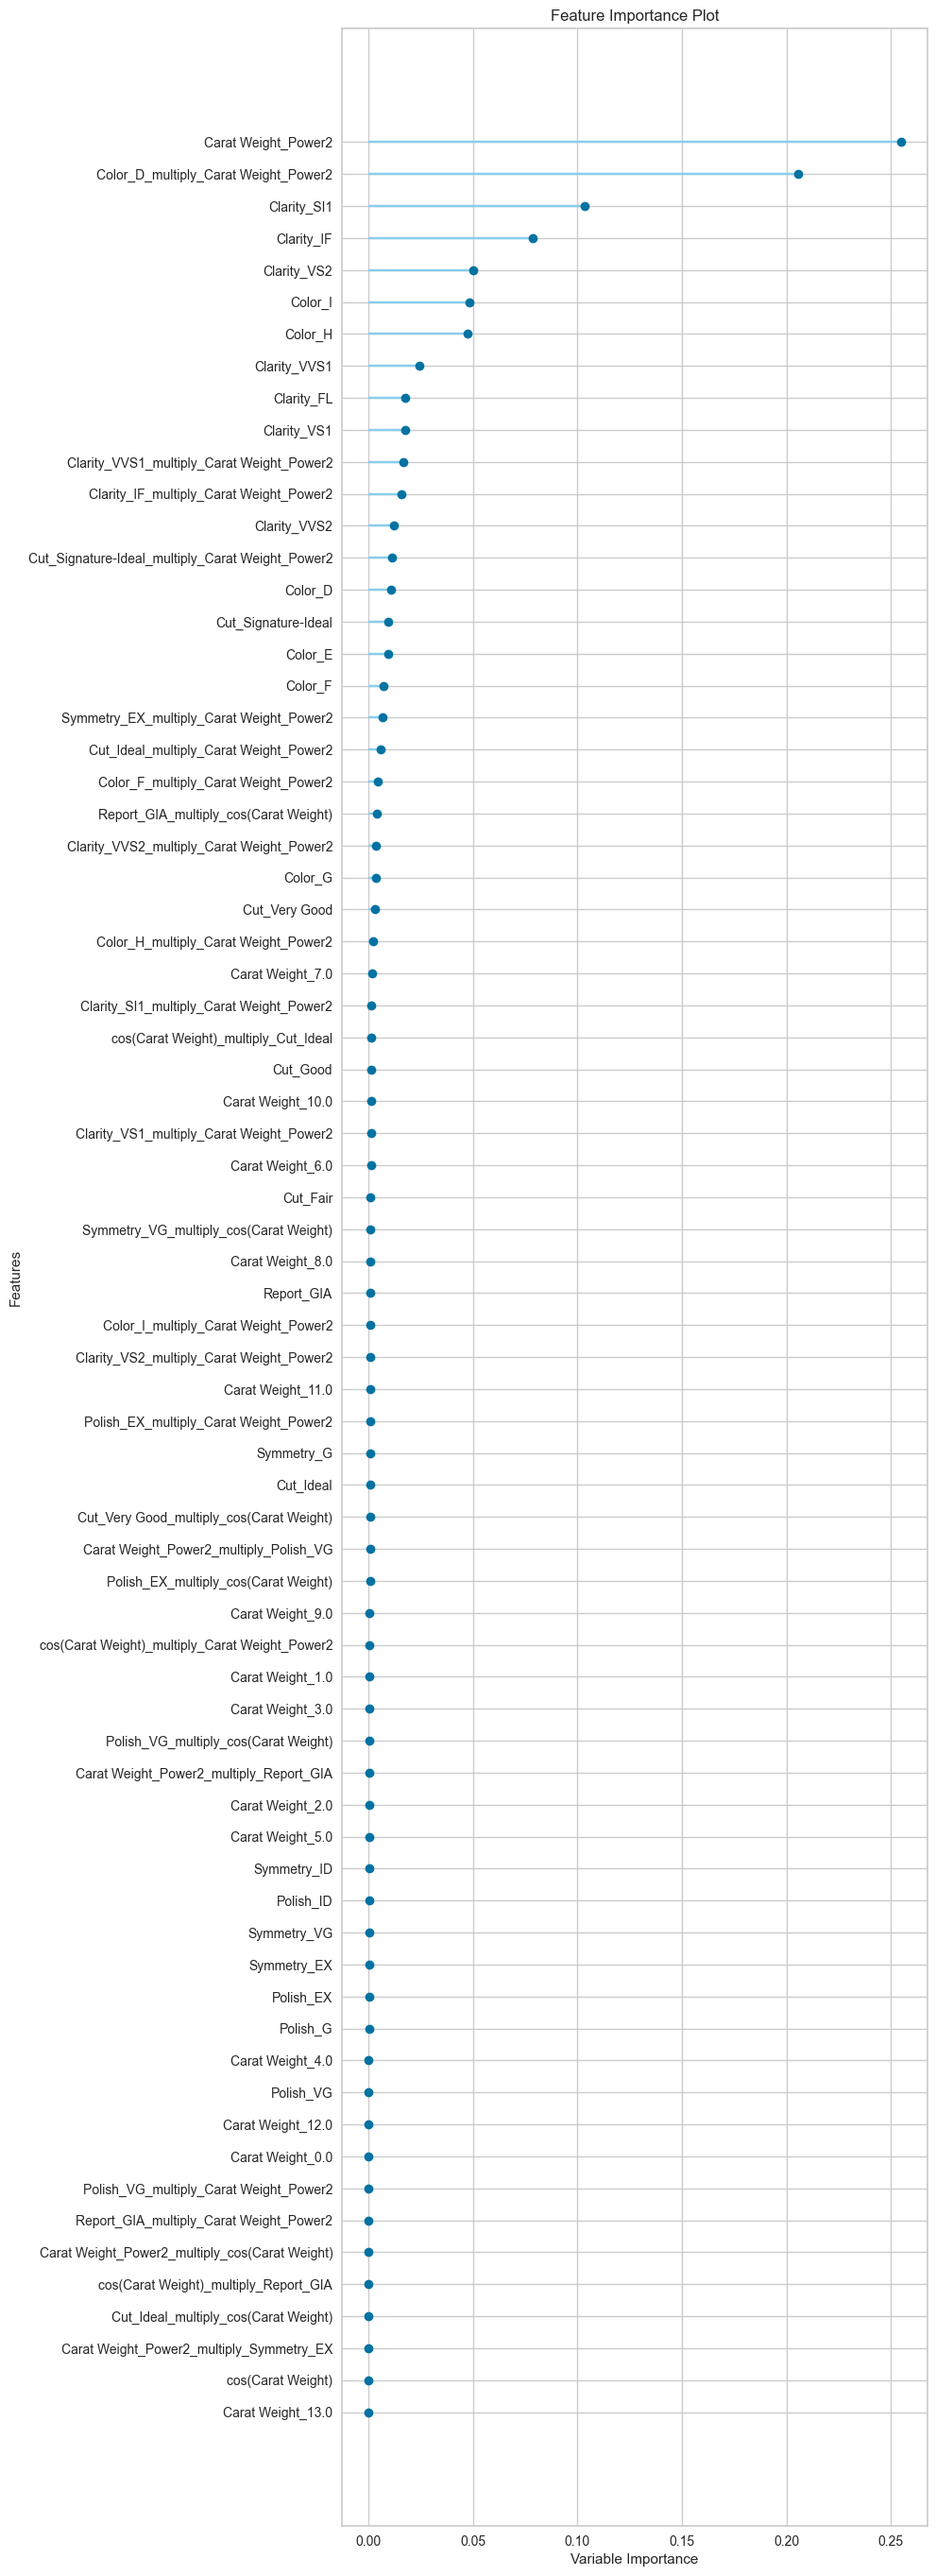

In [26]:
# check all feature importance
plot_model(best_model, plot = 'feature_all')

## Validation Curve

Model validation is used to determine how effective an estimator is on data that it has been trained on as well as how generalizable it is to new input. To measure a model’s performance we first split the dataset into training and test splits, fitting the model on the training data and scoring it on the reserved test data.

In order to maximize the score, the hyperparameters of the model must be selected which best allow the model to operate in the specified feature space. Most models have multiple hyperparameters and the best way to choose a combination of those parameters is with a grid search. However, it is sometimes useful to plot the influence of a single hyperparameter on the training and test data to determine if the estimator is underfitting or overfitting for some hyperparameter values.

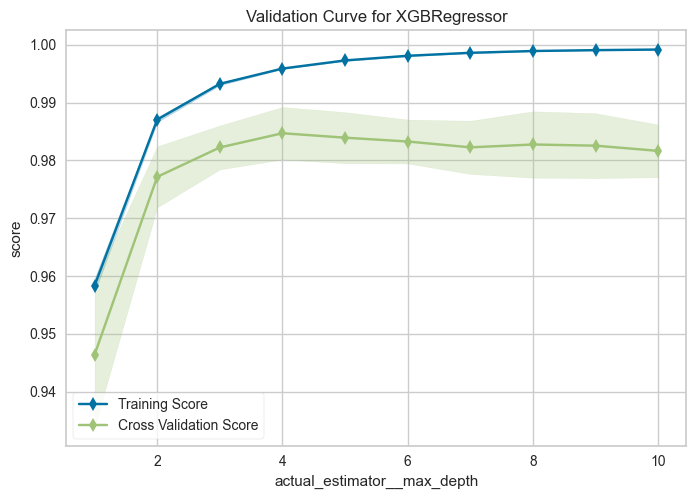

In [24]:
plot_model(best_model, plot = 'vc')

# 👉 Interpret Model

In [27]:
# create a lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,780.4729,3575329.5385,1890.8542,0.9678,0.0776,0.0576
1,665.7896,1693174.3121,1301.2203,0.9794,0.0724,0.0534
2,802.9185,4682842.7487,2163.9877,0.9582,0.0801,0.0576
3,892.8842,3822144.7547,1955.0306,0.9660,0.0868,0.0609
4,758.8140,2102652.1932,1450.0525,0.9793,0.0768,0.0585
5,683.8726,1896395.7243,1377.0968,0.9781,0.0738,0.0534
6,888.2189,8034041.6986,2834.4385,0.9395,0.0876,0.0602
7,803.4416,3405879.0667,1845.5024,0.9664,0.0878,0.0582
8,704.8618,1706257.2846,1306.2378,0.9835,0.0758,0.0588
9,633.1276,1682159.3886,1296.9809,0.9811,0.0684,0.0519


## SHAP Summary Plot

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

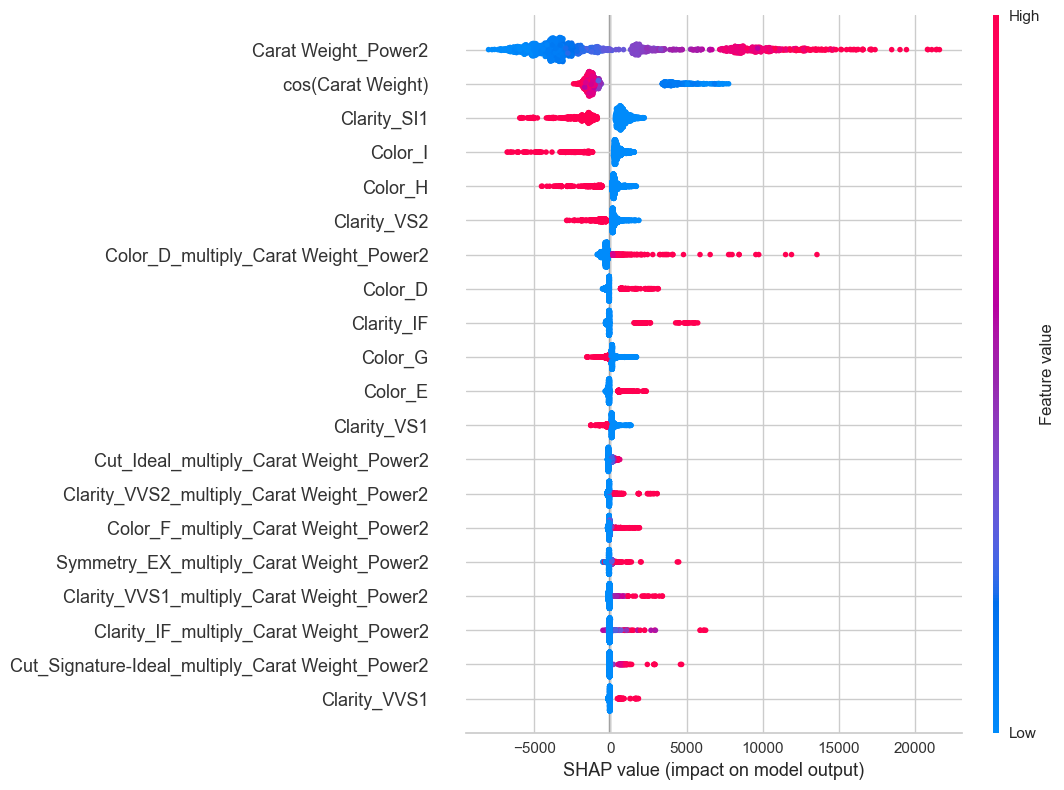

In [28]:
interpret_model(lightgbm)

# 👉 Predict New Observations

In [29]:
new_data = data.copy()
new_data.drop(['Price'], axis=1, inplace=True)
new_data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,Ideal,H,SI1,VG,EX,GIA
1,0.83,Ideal,H,VS1,ID,ID,AGSL
2,0.85,Ideal,H,SI1,EX,EX,GIA
3,0.91,Ideal,E,SI1,VG,VG,GIA
4,0.83,Ideal,G,SI1,EX,EX,GIA


In [30]:
# finalize means fit the entire pipeline on entire dataset including test data
# this should be the last step of your modeling (not mandatory)

final_best_model = finalize_model(best_model)

In [31]:
predictions = predict_model(final_best_model, data=new_data)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5347.203125
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3577.925781
2,0.85,Ideal,H,SI1,EX,EX,GIA,3508.788330
3,0.91,Ideal,E,SI1,VG,VG,GIA,4519.024902
4,0.83,Ideal,G,SI1,EX,EX,GIA,3378.798828


# 👉 Save / Load Pipeline with PyCaret

In [32]:
save_model(final_best_model, 'pycaret_regression_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                         

In [33]:
loaded_pycaret_pipeline = load_model('pycaret_regression_pipeline')
print(loaded_pycaret_pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_est

In [34]:
# display as image
from sklearn import set_config
set_config(display = 'diagram')

In [35]:
loaded_pycaret_pipeline

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=-1, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=123,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='auto',
                              validate_parameters=1, verbosity=0)]],
         verbose=False)